In [1]:

# imports
import os
import sys
import types
import json

# figure size/format
fig_width = 10
fig_height = 5
fig_format = 'retina'
fig_dpi = 96

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = fig_dpi
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  pio.renderers.default = "notebook_connected"
except Exception:
  pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass



# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
if r'':
  os.chdir(r'')

# reset state
%reset

def ojs_define(**kwargs):
  import json
  from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v
  
  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define


C:\Users\jonas\AppData\Local\Temp\ipykernel_32056\1140549349.py:20: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats(fig_format)


{"C:\\Users\\jonas\\AppData\\Local\\Programs\\Python\\Python310\\lib\\importlib\\_bootstrap.py": 1662380252.0, "C:\\Users\\jonas\\AppData\\Local\\Programs\\Python\\Python310\\lib\\importlib\\_bootstrap_external.py": 1662380252.0, "C:\\Users\\jonas\\AppData\\Local\\Programs\\Python\\Python310\\lib\\codecs.py": 1662380252.0, "C:\\Users\\jonas\\AppData\\Local\\Programs\\Python\\Python310\\lib\\encodings\\aliases.py": 1662380252.0, "C:\\Users\\jonas\\AppData\\Local\\Programs\\Python\\Python310\\lib\\encodings\\__init__.py": 1662380252.0, "C:\\Users\\jonas\\AppData\\Local\\Programs\\Python\\Python310\\lib\\encodings\\utf_8.py": 1662380252.0, "C:\\Users\\jonas\\AppData\\Local\\Programs\\Python\\Python310\\lib\\abc.py": 1662380252.0, "C:\\Users\\jonas\\AppData\\Local\\Programs\\Python\\Python310\\lib\\io.py": 1662380252.0, "C:\\Users\\jonas\\AppData\\Local\\Programs\\Python\\Python310\\lib\\stat.py": 1662380252.0, "C:\\Users\\jonas\\AppData\\Local\\Programs\\Python\\Python310\\lib\\_collectio

In [2]:
#| echo: false
from tabulate import tabulate

In [3]:
import pandas as pd
admission = pd.read_csv("https://stats.idre.ucla.edu/stat/data/binary.csv")
admission.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [4]:
#| echo: true
#| fig-align: "center"
import seaborn as sns
import matplotlib.pyplot as plt
#sns.pairplot(admission)

In [5]:
import numpy as np
np.corrcoef(np.asarray(admission.T)) 

array([[ 1.        ,  0.18443428,  0.17821225, -0.24251318],
       [ 0.18443428,  1.        ,  0.38426588, -0.12344707],
       [ 0.17821225,  0.38426588,  1.        , -0.05746077],
       [-0.24251318, -0.12344707, -0.05746077,  1.        ]])

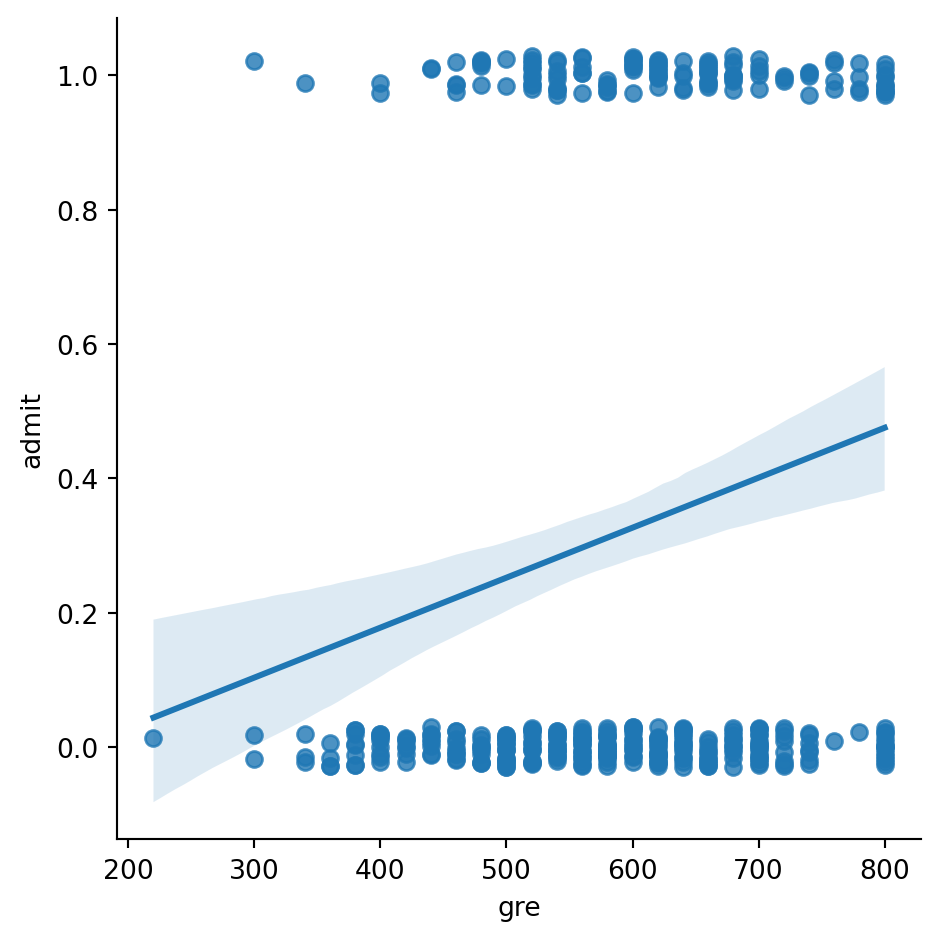

In [6]:
#| echo: true
#| fig-align: "center"
sns.lmplot(x="gre", y="admit", data=admission, y_jitter = .03)
plt.show()

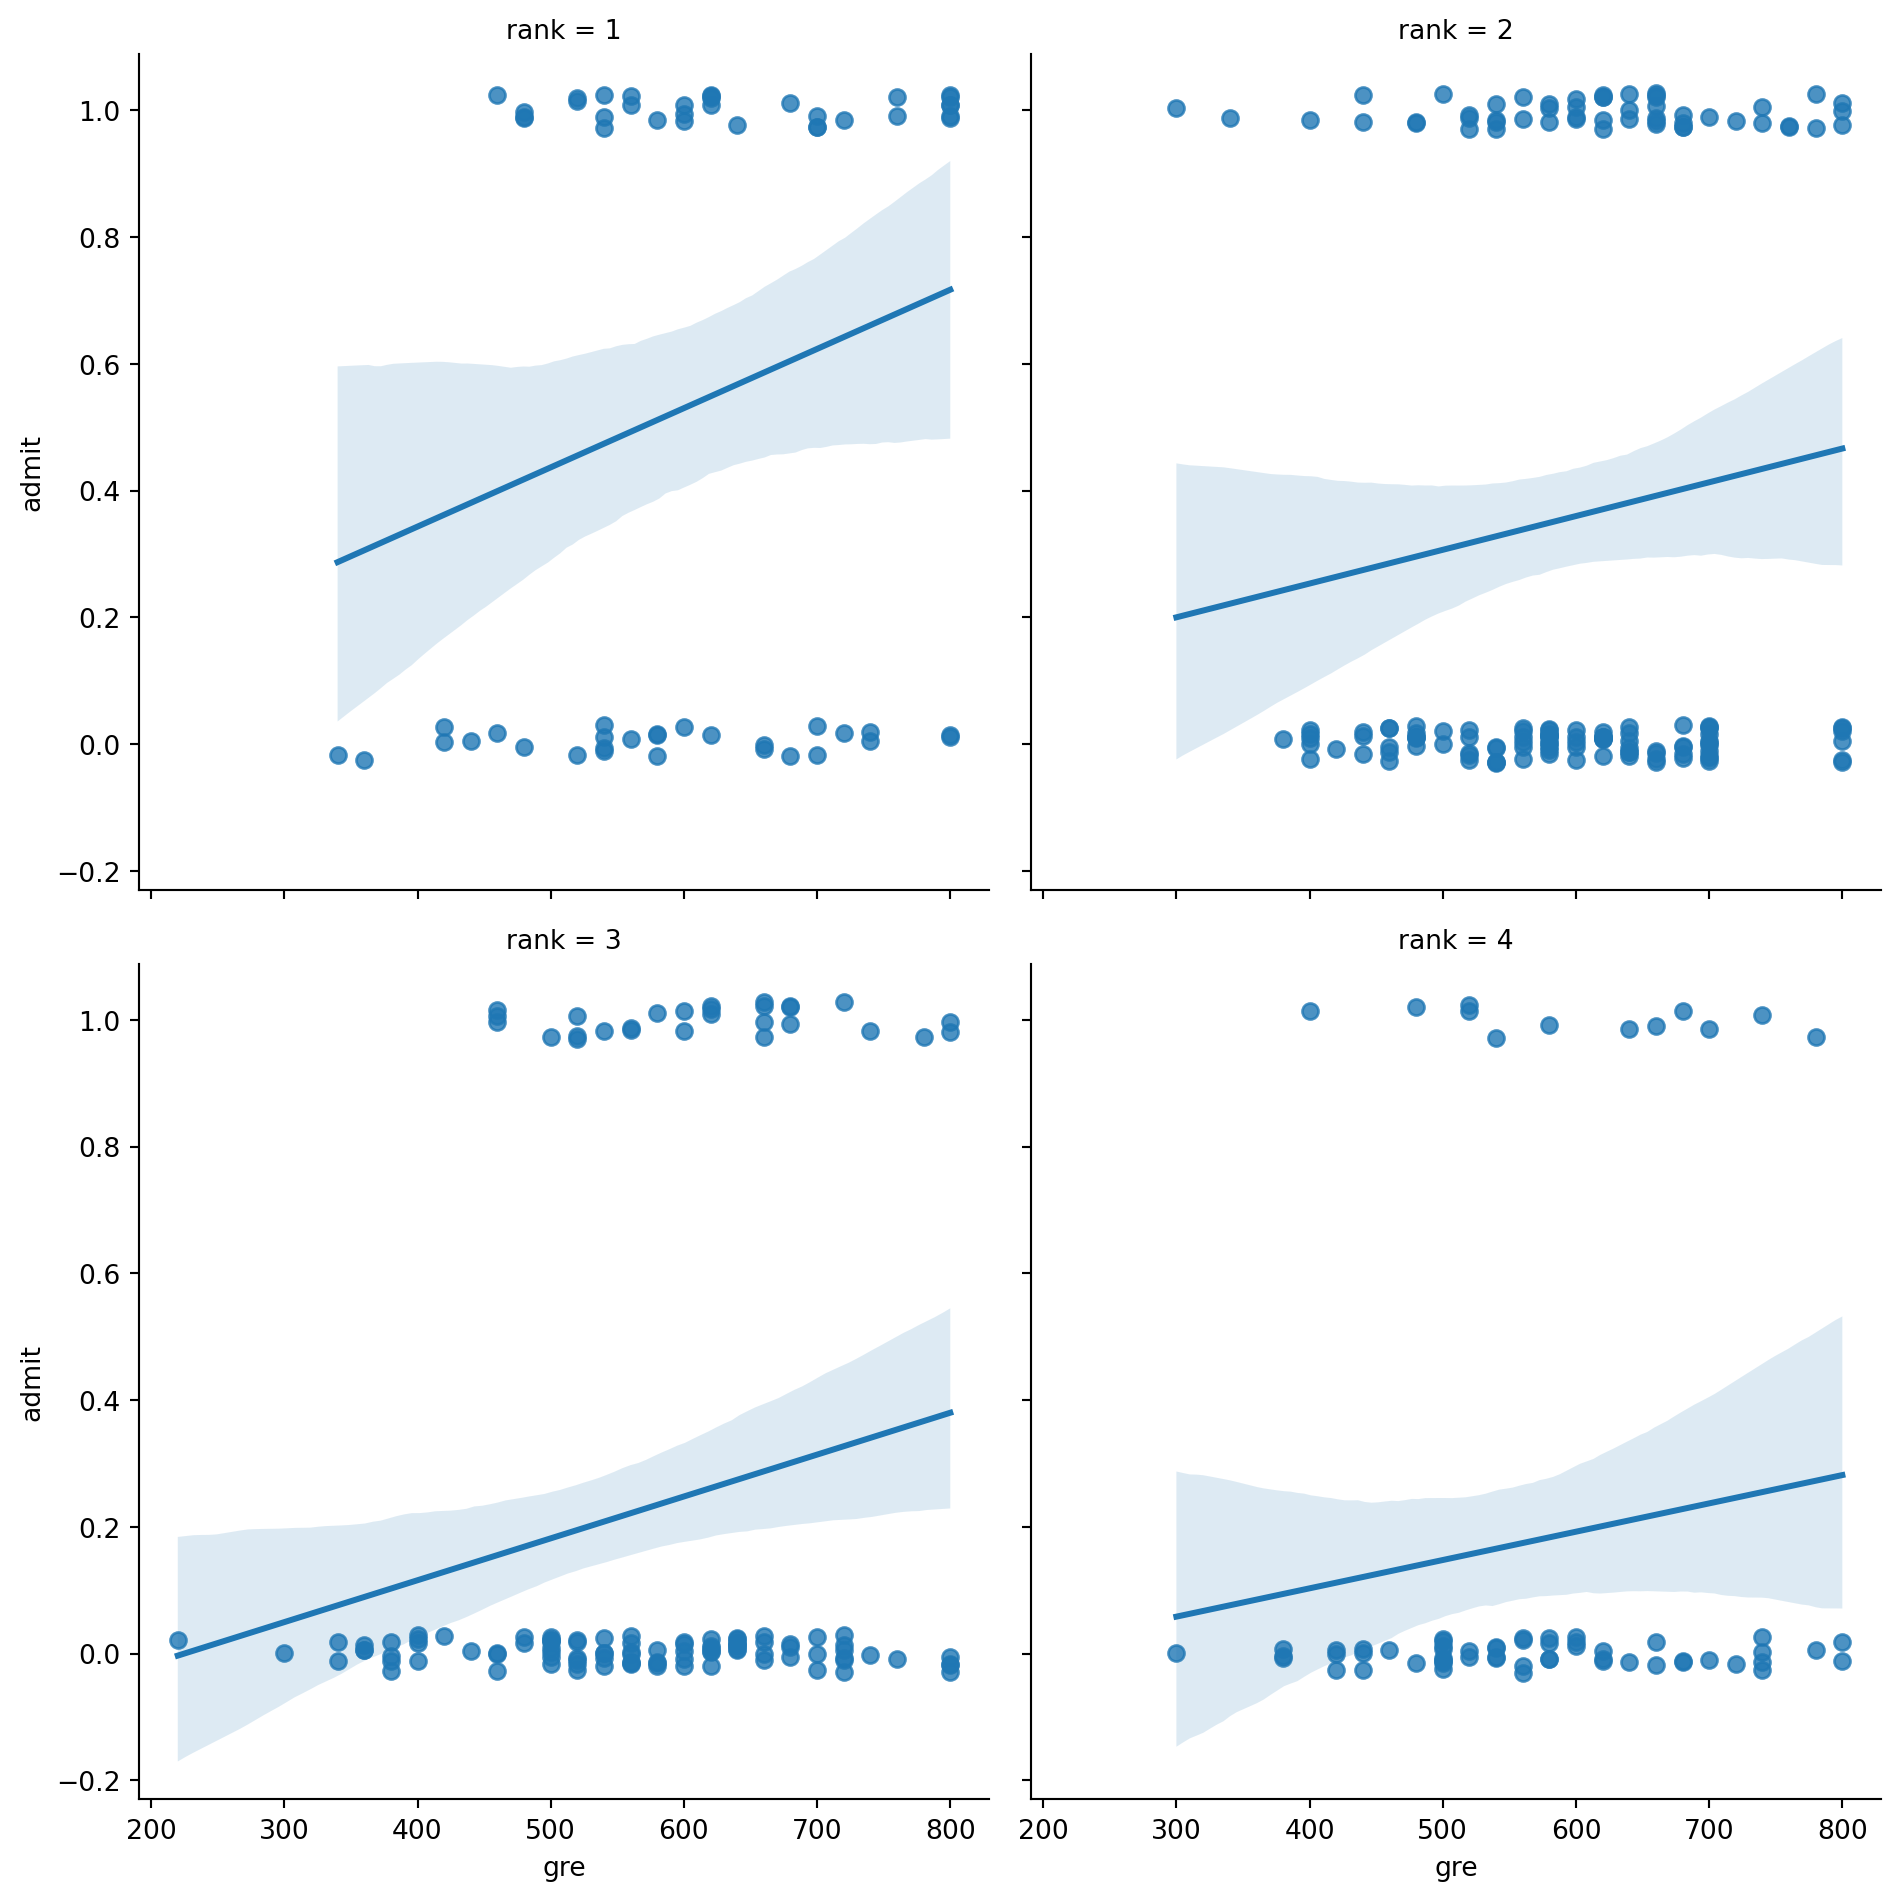

In [7]:
#| echo: true
#| fig-align: "center"
sns.lmplot(x="gre", y="admit", col = "rank", data=admission, y_jitter = .03,col_wrap = 2)
plt.show()

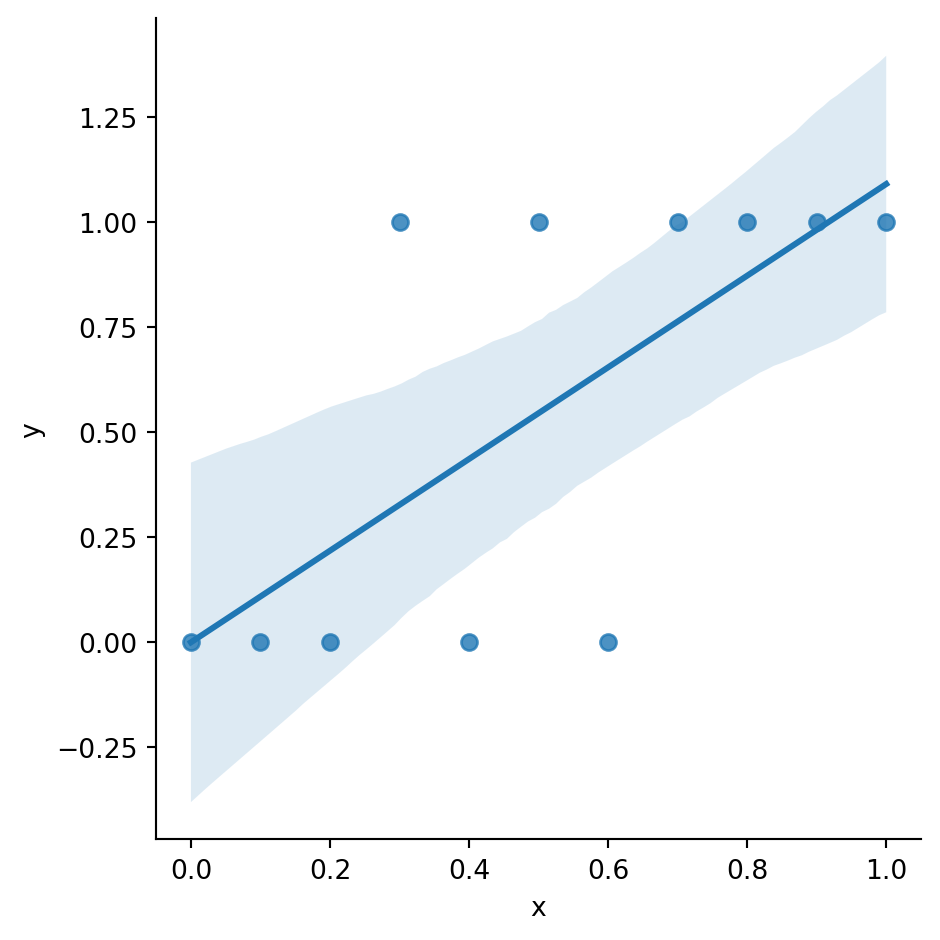

In [8]:
#| fig-align: "center"
import numpy as np
x = np.linspace(0, 1, 11)
y = np.array([0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1])
sns.lmplot(x="x", y="y", data=pd.DataFrame({'x':x, 'y':y}))
plt.show()

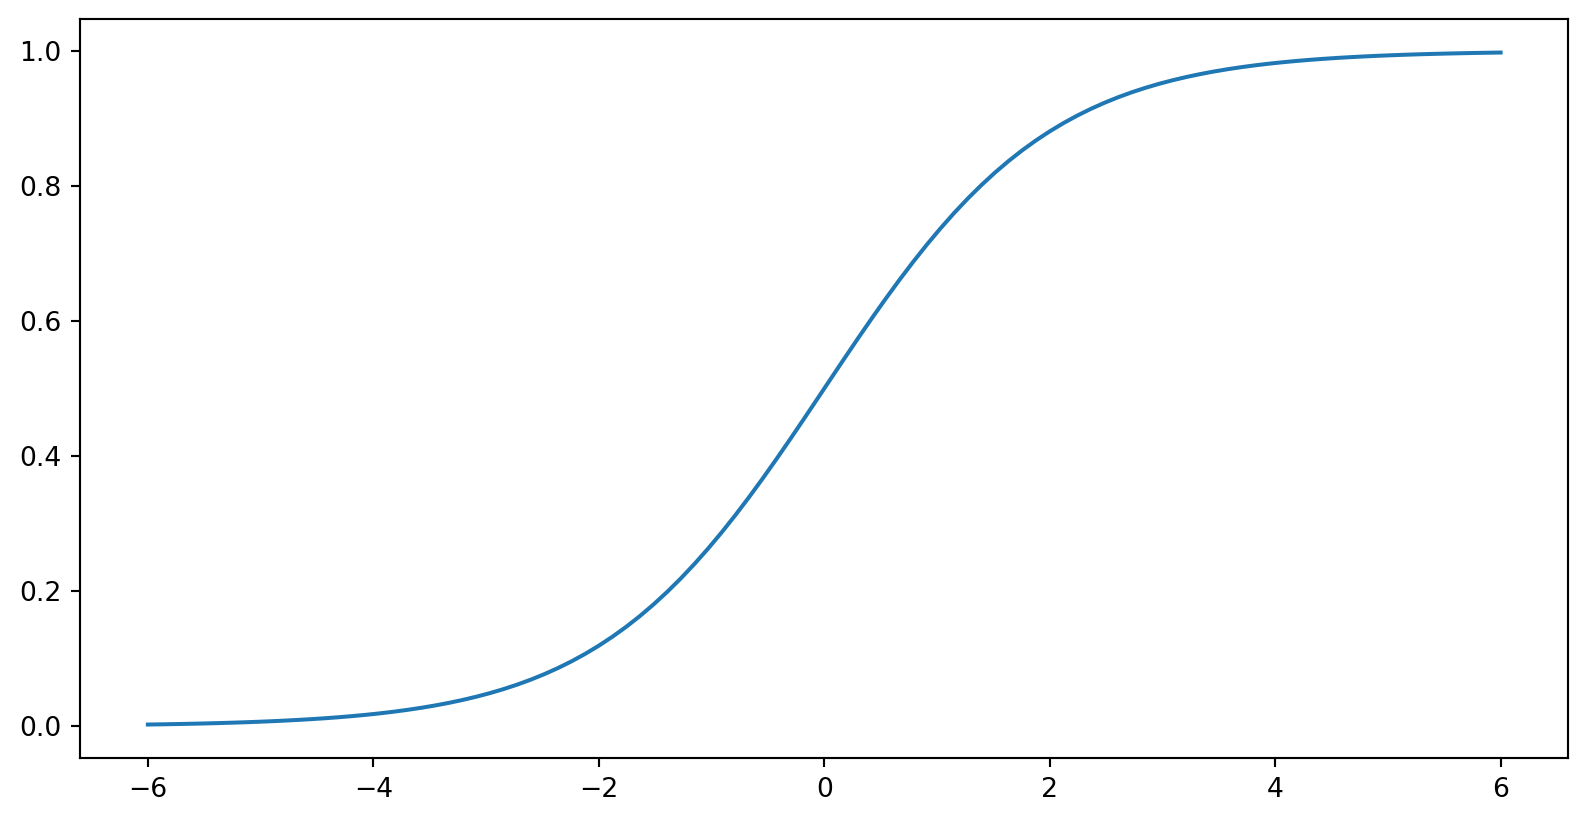

In [9]:
#| echo: true
#| fig-align: "center"
logistic = lambda x: 1/(1 + np.exp(-x))
x_ = np.linspace(-6, 6, 100)
plt.plot(x_, logistic(x_))
plt.show()

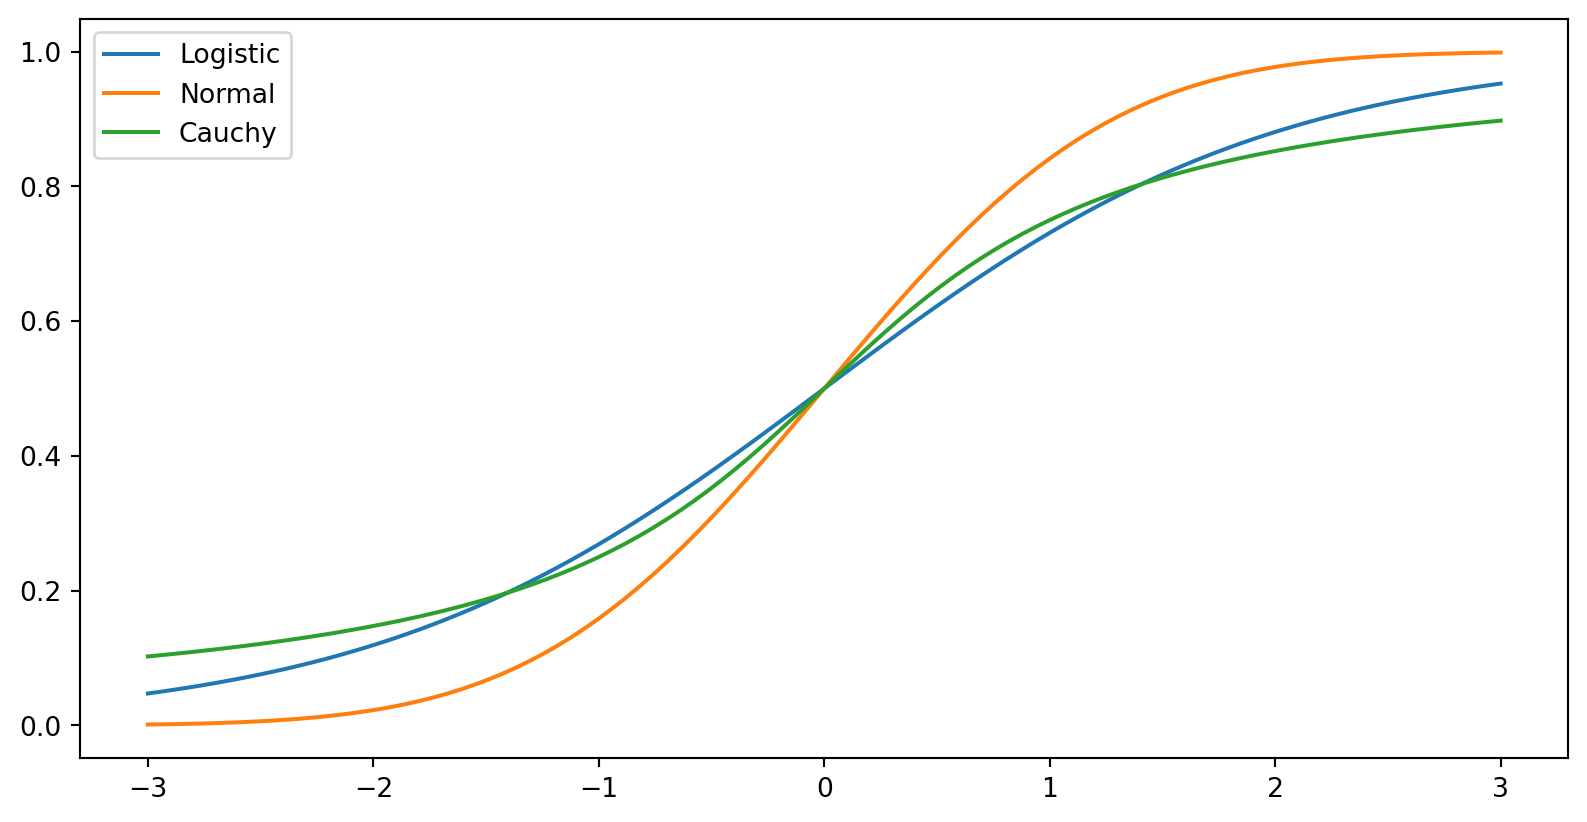

In [10]:
#| echo: false
#| fig-align: "center"
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(-3,3,100)
logistic = lambda x: 1/(1 + np.exp(-x))
plt.plot(x, logistic(x), label = "Logistic")
plt.plot(x, stats.norm.cdf(x), label = "Normal")
plt.plot(x, stats.cauchy.cdf(x), label = "Cauchy")
plt.legend()
plt.show()


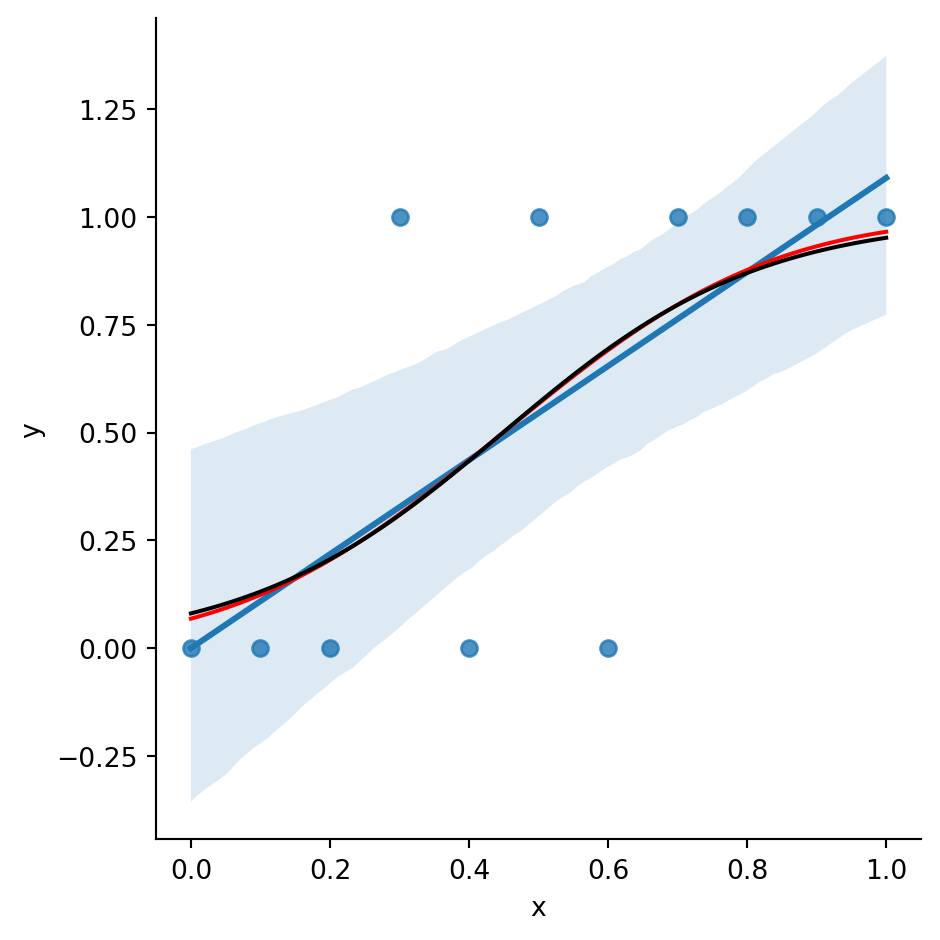

In [11]:
#| eval: true
#| fig-align: "center"
from scipy.optimize import curve_fit
from scipy import stats

x = np.linspace(0, 1, 11)
y = np.array([0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1])

func_logistic = lambda x, a, b: logistic(a + b * x)
param_logistic = curve_fit(func_logistic, x, y)[0]

func_norm = lambda x, a, b: stats.norm.cdf(a + b * x)
param_norm = curve_fit(func_norm, x, y)[0]

#plt.scatter(x, y)
x_ = np.linspace(0, 1, 100)
sns.lmplot(x="x", y="y", data=pd.DataFrame({'x':x, 'y':y}))
plt.plot(x_, func_norm(x_, param_norm[0], param_norm[1]), color = "red")
plt.plot(x_, func_logistic(x_, param_logistic[0], param_logistic[1]), color = "black")
plt.show()

In [12]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
probit = smf.probit("admit ~ gre", data=admission).fit()
logit = smf.logit("admit ~ gre", data=admission).fit()

Optimization terminated successfully.
         Current function value: 0.607481
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607570
         Iterations 5


In [13]:
mod_logistic = smf.glm(formula="admit ~ gre", data=admission, family=sm.families.Binomial()).fit() 
print(mod_logistic.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  admit   No. Observations:                  400
Model:                            GLM   Df Residuals:                      398
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -243.03
Date:                Thu, 17 Nov 2022   Deviance:                       486.06
Time:                        15:05:32   Pearson chi2:                     399.
No. Iterations:                     4   Pseudo R-squ. (CS):            0.03420
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.9013      0.606     -4.787      0.0

In [14]:
import numpy as np
rng = np.random.default_rng(seed = 313)
n = 100
x = np.linspace(-1, 1, n)
z = 1 + 2 * x + rng.normal(size = n) # Latent variable
y = 1 * (z >= 0)

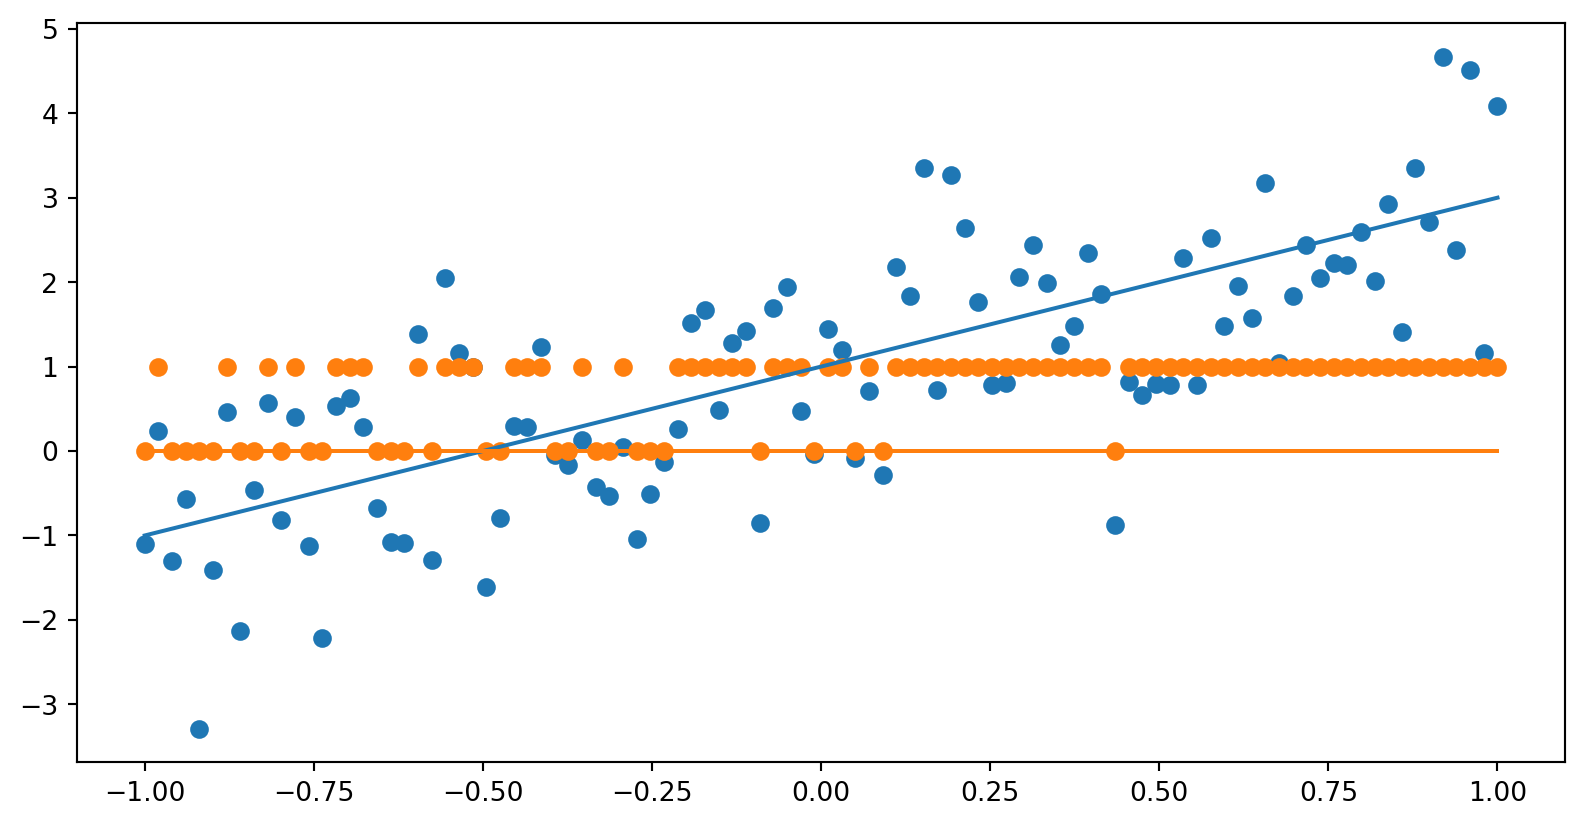

In [15]:
#| echo: false
import matplotlib.pylab as plt
plt.scatter(x, z)
plt.scatter(x, y)
plt.plot(x, 1 + 2 * x)
plt.plot(x, 0 * x)

In [16]:
import statsmodels.formula.api as smf
smf.ols("z ~ x", data = {"x": x, "z": z}).fit().params

Intercept    0.901014
x            1.891271
dtype: float64

In [17]:
smf.probit("y ~ x", data = {"x": x, "y": y}).fit().params

Optimization terminated successfully.
         Current function value: 0.428868
         Iterations 6


Intercept    0.845455
x            1.617026
dtype: float64

In [18]:
import numpy as np
rng = np.random.default_rng(seed = 313)
n = 100
x = np.linspace(-1, 1, n)
z = 1 + 2 * x + rng.normal(size = n, scale = 5) # Latent variable
y = 1 * (z >= 0)

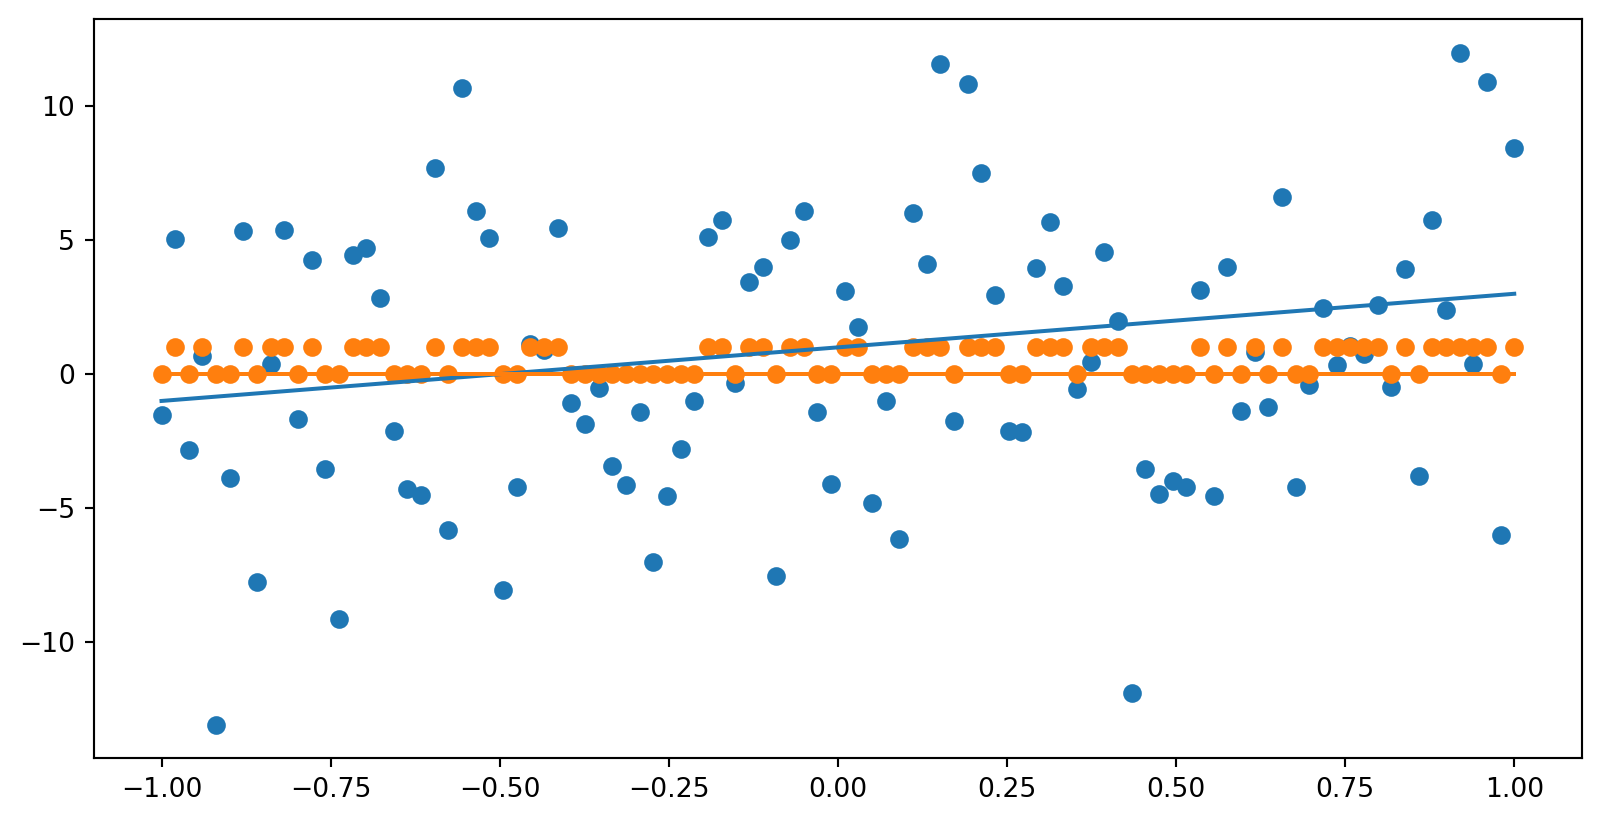

In [19]:
#| echo: false
import matplotlib.pylab as plt
plt.scatter(x, z)
plt.scatter(x, y)
plt.plot(x, 1 + 2 * x)
plt.plot(x, 0 * x)

In [20]:
smf.probit("y ~ x", data = {"x": x, "y": y}).fit().params

Optimization terminated successfully.
         Current function value: 0.681655
         Iterations 4


Intercept    0.051516
x            0.317042
dtype: float64

In [21]:
rng = np.random.default_rng(seed = 313)
z = 1 / 5 + 2 / 5 * x + rng.normal(size = n, scale = 1)
y = 1 * (z >= 0)
smf.probit("y ~ x", data = {"x": x, "y": y}).fit().params

Optimization terminated successfully.
         Current function value: 0.681655
         Iterations 4


Intercept    0.051516
x            0.317042
dtype: float64

In [22]:
mod = smf.probit("admit ~ gre + gpa + rank", data=admission).fit()

Optimization terminated successfully.
         Current function value: 0.574351
         Iterations 5


In [23]:
np.exp(mod.params)

Intercept    0.123501
gre          1.001399
gpa          1.590995
rank         0.717694
dtype: float64